In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from quantfin.random_walk import geometric_brownian
from quantfin.volatility import moving_average, ewma, garch, garch_asym

In [7]:
# Generate random price data
t = np.arange(0, 250) # Time
A = geometric_brownian(250, 0.01, 0.0, 0.4) # Closing prices

# Calculate returns
R = np.array([(A[n] - A[n-1]) / A[n-1] for n in range(1, 250)]) # Returns
t = t[1:]

In [8]:
# Calculate using 20-day moving average
M = 20
sigma = moving_average(R, M)

# Calculate using exponentially weighted moving average
smoothing = 0.98
sigma2 = ewma(R, smoothing)

# Calculate using GARCH model
sigma3, _ = garch(R)

# Calculate using aymmetric GARCH model (this takes a while)
sigma4, _ = garch_asym(R)

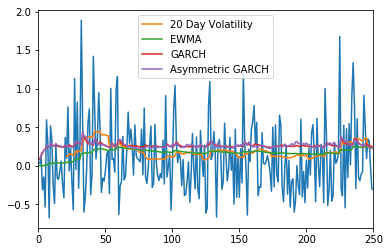

In [9]:
# Plot results
plt.plot(t, R);
moving_plot, = plt.plot(t[M:], sigma);
ewma_plot, = plt.plot(t, sigma2);
garch_plot, = plt.plot(t, sigma3);
garch_a_plot, = plt.plot(t, sigma4)
plt.xlim((0, 250));
plt.legend([moving_plot, ewma_plot, garch_plot, garch_a_plot],
           ["20 Day Volatility",
            "EWMA",
            "GARCH",
            "Asymmetric GARCH"]);